<a href="https://colab.research.google.com/github/snaik4398/GAN-model-training/blob/main/ImageColorizerColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='GREEN'> IMAGE COLORIZATION USING GAN  </font>**

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2347, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2347 (delta 0), reused 0 (delta 0), pack-reused 2344
Receiving objects: 100% (2347/2347), 69.46 MiB | 37.49 MiB/s, done.
Resolving deltas: 100% (1081/1081), done.


In [2]:
cd DeOldify

/content/DeOldify


In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [4]:
!pip install -r colab_requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 21.6 MB/s 
     |████████████████████████████████| 129 kB 53.4 MB/s 
     |████████████████████████████████| 1.9 MB 57.0 MB/s 
     |████████████████████████████████| 78 kB 9.9 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=bf60f68348ff5b2bad7172f755c5bf29d89c1e5b8b282898fdf02d62938c8bea
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [5]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [6]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2022-05-25 17:41:31--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  30.9MB/s    in 8.3s    

2022-05-25 17:41:40 (29.4 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [7]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2022-05-25 17:41:40--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2022-05-25 17:41:40 (106 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [8]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

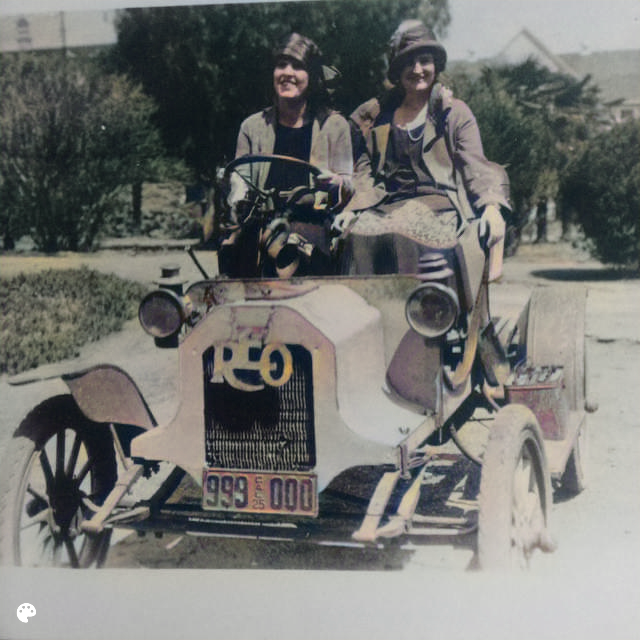

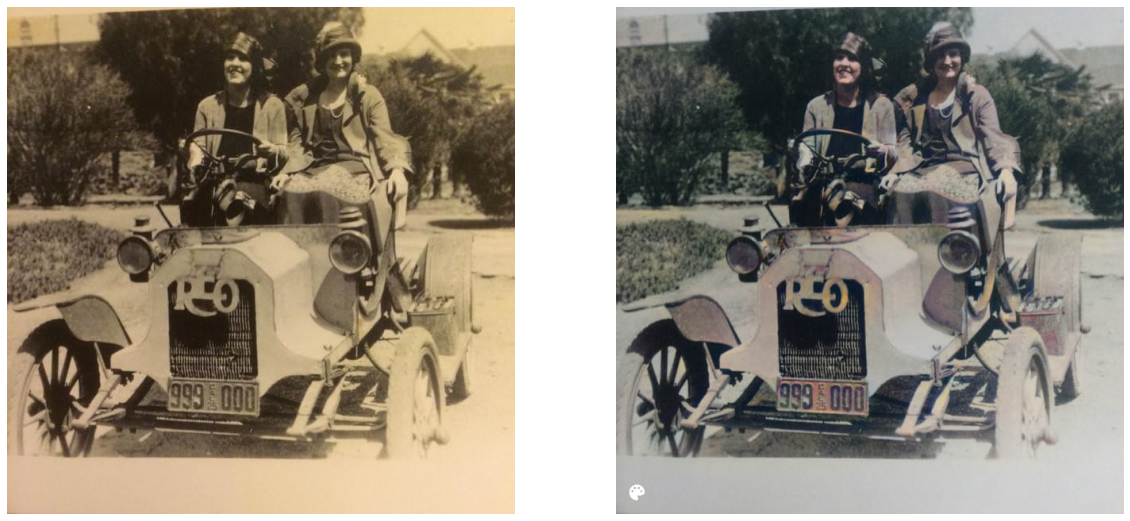

In [11]:
source_url = 'https://preview.redd.it/zpvw869wdm191.jpg?width=640&crop=smart&auto=webp&s=896912c94a39927c0a4e4cdfa16b543ab5756437' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

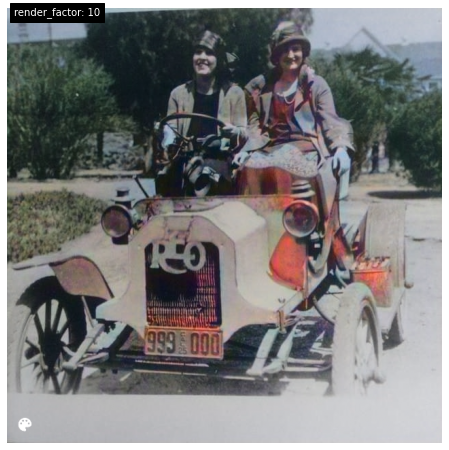

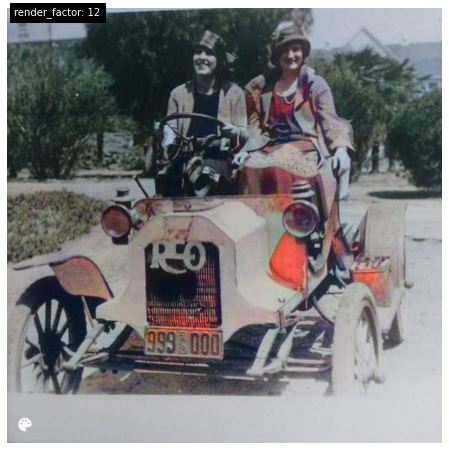

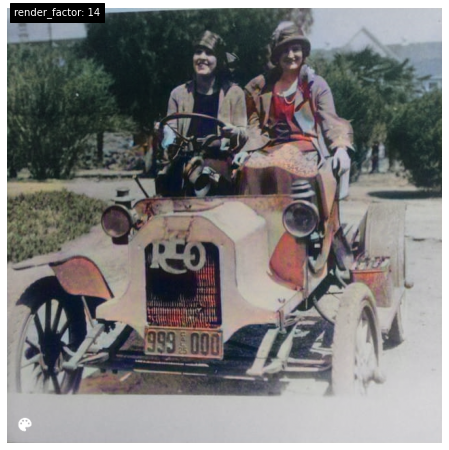

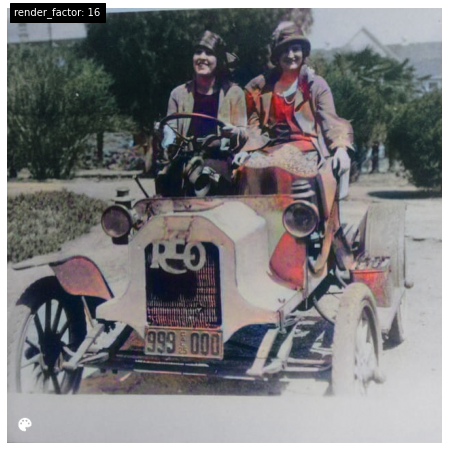

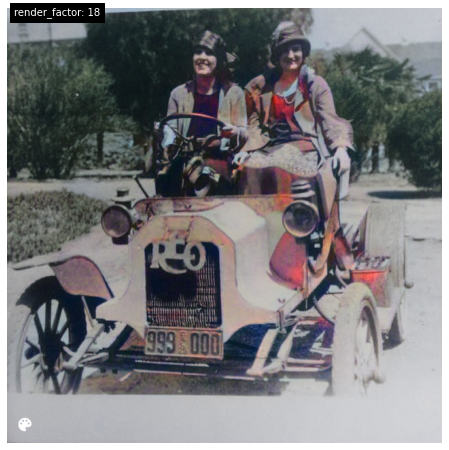

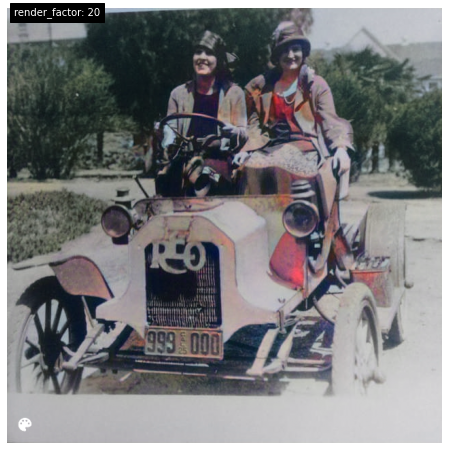

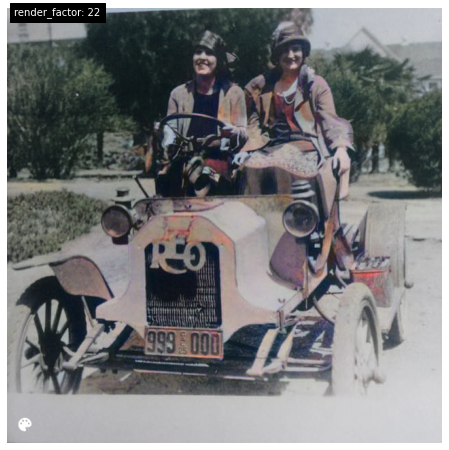

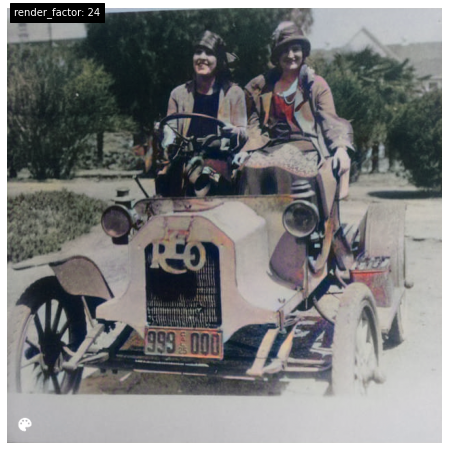

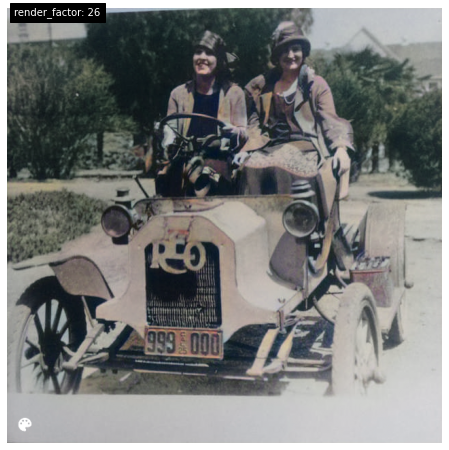

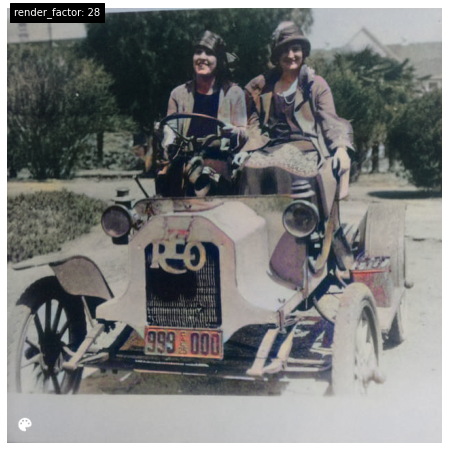

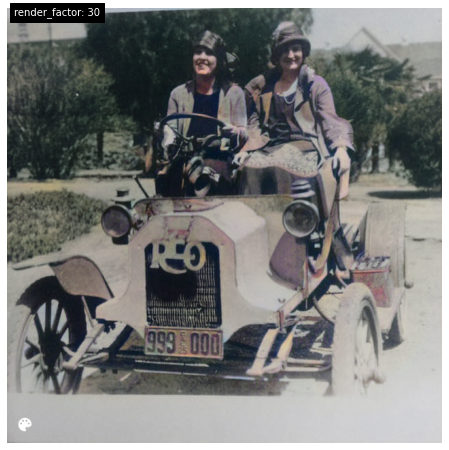

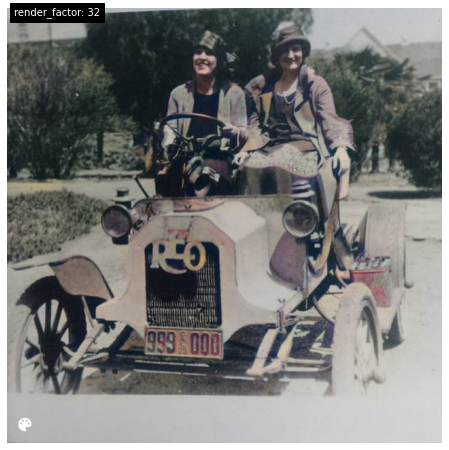

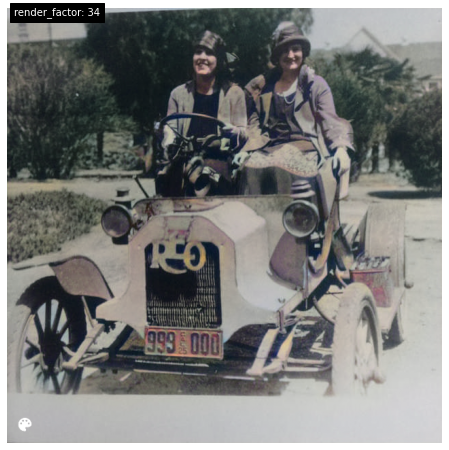

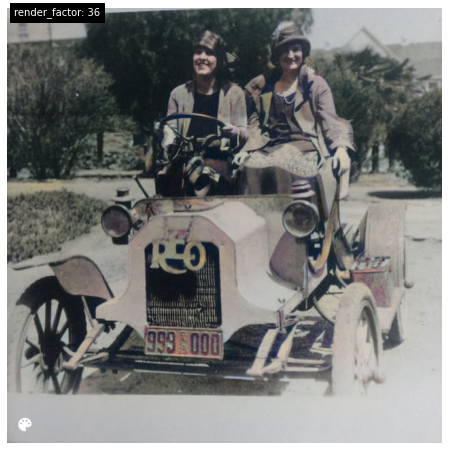

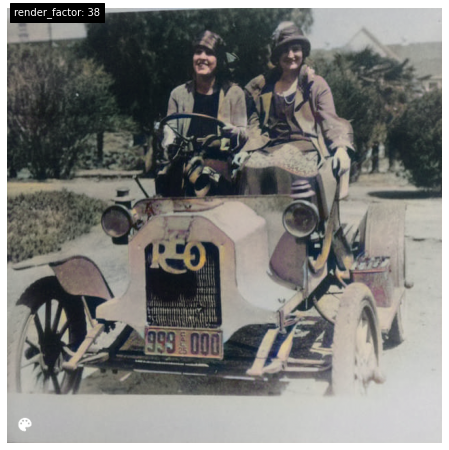

In [12]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

---
#⚙  image sources FROM REDIT FOR SAMPLE INPUT 

* [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)